In [1]:
#Reading in CSV file
import pandas as pd
data = pd.read_csv('predict_outcome.csv')

In [2]:
#Checking in the shape
data.shape

(776503, 28)

In [3]:
#Looking to see how many null values are present
data.isna().sum()

Unnamed: 0                   0
pitch_name                2082
release_speed             1768
events                       0
description                  0
p_throws                     0
type                         0
hit_distance_sc         586979
launch_speed            571142
launch_angle            571141
launch_speed_angle      637734
effective_speed           9627
pitch_number                 0
spin_rate_deprecated    776503
hit_location            600687
bb_type                 637726
release_spin_rate        29078
game_date                    0
pitch_number.1               0
vx0                       1835
vy0                       1835
vz0                       1835
ax                        1835
ay                        1835
az                        1835
pfx_x                     1835
pfx_z                     1835
bauer_units              29078
dtype: int64

In [4]:
#Dropping unneeded columns
data.drop(columns=['Unnamed: 0', 'p_throws', 'type', 'pitch_number.1','game_date', 'bb_type', 'spin_rate_deprecated',\
                  'pitch_number','description' ],inplace = True)

In [ ]:
#Rename columns!!!

In [5]:
#Determining what to do with null values
#When hit distance, launch speed, and launch angle are null - should be zero
data.head(10)

,pitch_name,release_speed,events,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,Cutter,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,Slider,81.5,ball,NaN,NaN,NaN,NaN,81.301,NaN,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,Curveball,77.1,ball,NaN,NaN,NaN,NaN,75.063,NaN,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,Cutter,87.6,strike,NaN,NaN,NaN,NaN,86.856,NaN,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,Cutter,86.2,strike,NaN,NaN,NaN,NaN,86.030,NaN,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448
5,4-Seam Fastball,91.8,ball,NaN,NaN,NaN,NaN,90.941,NaN,2115.0,-9.252,-133.420,-2.692,10.444,31.375,-19.811,0.684125,1.187567,23.039216
6,Cutter,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.272,-128.235,-2.390,-1.473,28.023,-28.666,-0.253858,0.498133,27.979569
7,Curveball,77.2,ball,NaN,NaN,NaN,NaN,75.389,NaN,2514.0,-4.620,-112.364,-0.727,-5.753,24.912,-42.320,-0.771558,-0.973900,32.564767
8,Slider,80.0,ball,NaN,NaN,NaN,NaN,78.974,NaN,NaN,-1.072,-116.500,-0.560,-1.230,22.311,-35.829,-0.255250,-0.189867,NaN
9,4-Seam Fastball,89.5,foul,233.0,75.0,35.0,NaN,88.828,NaN,2438.0,-7.927,-130.104,-3.647,3.183,27.453,-22.159,0.128850,1.031333,27.240223


In [5]:
#instead of Nan going to put a zero for hit location
#Inputting correct values for null values 
import numpy as np 
data.hit_location = np.where(data.hit_location.isnull(), 0, data.hit_location)
data.launch_speed = np.where(data.launch_speed.isnull(), 0, data.launch_speed)
data.launch_speed_angle = np.where(data.launch_speed_angle.isnull(), 0, data.launch_speed_angle)
data.hit_distance_sc = np.where(data.hit_distance_sc.isnull(), 0 , data.hit_distance_sc)
data.launch_angle = np.where(data.launch_angle.isnull(), 0, data.launch_angle)


In [6]:
#Dropping remaining null values
data.dropna(inplace = True)

In [23]:
#should drop field_error and hit_by_pitch
data.events.value_counts()

ball            269124
strike          206201
foul            135729
out              88195
single           28855
double            8557
home_run          5556
field_error       1818
hit_by_pitch      1691
triple             849
Name: events, dtype: int64

In [8]:
#No null values remaining in the dataset
data.isna().sum()

pitch_name            0
release_speed         0
events                0
hit_distance_sc       0
launch_speed          0
launch_angle          0
launch_speed_angle    0
effective_speed       0
hit_location          0
release_spin_rate     0
vx0                   0
vy0                   0
vz0                   0
ax                    0
ay                    0
az                    0
pfx_x                 0
pfx_z                 0
bauer_units           0
dtype: int64

In [9]:
#Checking shape of the dataframe
data.shape

(746575, 19)

In [7]:
#Label encoding pitch name for the computer to recognize that there are different pitches
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['pitch_name']= le.fit_transform(data['pitch_name'])

In [11]:
data.head(10)

,pitch_name,release_speed,events,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,4,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,7,81.5,ball,0.0,0.0,0.0,0.0,81.301,0.0,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,3,77.1,ball,0.0,0.0,0.0,0.0,75.063,0.0,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,4,87.6,strike,0.0,0.0,0.0,0.0,86.856,0.0,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,4,86.2,strike,0.0,0.0,0.0,0.0,86.030,0.0,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448
5,1,91.8,ball,0.0,0.0,0.0,0.0,90.941,0.0,2115.0,-9.252,-133.420,-2.692,10.444,31.375,-19.811,0.684125,1.187567,23.039216
6,4,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.272,-128.235,-2.390,-1.473,28.023,-28.666,-0.253858,0.498133,27.979569
7,3,77.2,ball,0.0,0.0,0.0,0.0,75.389,0.0,2514.0,-4.620,-112.364,-0.727,-5.753,24.912,-42.320,-0.771558,-0.973900,32.564767
9,1,89.5,foul,233.0,75.0,35.0,0.0,88.828,0.0,2438.0,-7.927,-130.104,-3.647,3.183,27.453,-22.159,0.128850,1.031333,27.240223
10,0,85.6,out,300.0,91.6,37.0,3.0,85.222,9.0,1360.0,-6.415,-124.506,-0.322,11.561,26.242,-24.781,0.899833,0.872233,15.887850


# Testing models with a Subset of the data

In [12]:
#Going to initially test models with a subset of the dataset
#Using 14,023 rows to test models
test_data = data.loc[:730000:50]
test_data.shape

(14023, 19)

In [12]:
#Breaking down into X and Y values to feed to model
X = test_data.drop(columns=['events'], axis =1)
y = test_data.events

NameError: name 'test_data' is not defined

Not going to scale the data initially

In [14]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Running a logistic regression as a baseline

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [28]:
#Get R-squared value for training and testing data
print(f"R-sqaured training data: {classifier.score(X_train, y_train)}")
print(f"R-squared testing data: {classifier.score(X_test, y_test)}")

R-sqaured training data: 0.6391556527526862
R-squared testing data: 0.6354820308043354


The logistic regression returned R-squared values for both training and testing data of .63. A respectable baseline.
Could graph feature importance next.

In [30]:
#Looking at classification report, f1 score of .59
#Will use that to compare to other models
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ball       0.53      0.98      0.69      1253
      double       0.33      0.31      0.32        36
 field_error       0.00      0.00      0.00         5
        foul       0.97      0.49      0.65       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       0.97      1.00      0.99        34
         out       0.78      0.94      0.85       414
      single       0.78      0.43      0.55       150
      strike       0.87      0.21      0.33       972
      triple       0.00      0.00      0.00         8

   micro avg       0.64      0.64      0.64      3506
   macro avg       0.52      0.43      0.44      3506
weighted avg       0.74      0.64      0.59      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing a gradient boosting model next

In [45]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-sqaured training data: {model.score(X_train, y_train)}")
print(f"R-squared testing data: {model.score(X_test, y_test)}")

R-sqaured training data: 0.7565845773509556
R-squared testing data: 0.6988020536223617


Gradient Boosting produced an improved training score with a .75 but it dipped when testing the data to .698.

In [46]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.62      0.87      0.72      1253
      double       0.40      0.22      0.29        36
 field_error       0.00      0.00      0.00         5
        foul       0.94      0.49      0.65       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       1.00      0.94      0.97        34
         out       0.89      0.98      0.93       414
      single       0.87      0.80      0.83       150
      strike       0.63      0.50      0.56       972
      triple       0.00      0.00      0.00         8

   micro avg       0.70      0.70      0.70      3506
   macro avg       0.54      0.48      0.50      3506
weighted avg       0.72      0.70      0.69      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


With a f1 score of .69, the gradient boosting model looks to be superior than the logistic regression initially.

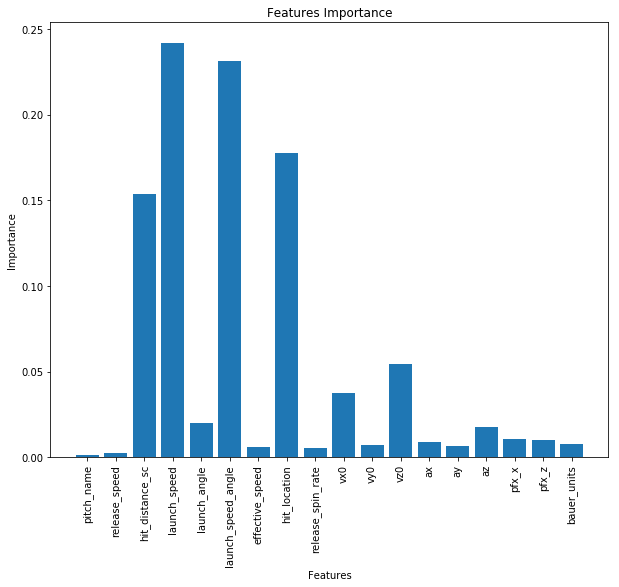

In [48]:
#Feature important breakdown of the model
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

Testing Support Vector Machines 

In [23]:
#SVM
#Not much of a difference between ovo and ovr
from sklearn import svm
clf = svm.SVC(gamma=0.00001, decision_function_shape='ovo', class_weight= None, )
clf.fit(X_train, y_train)
print(f"R-sqaured training data: {clf.score(X_train, y_train)}")
print(f"R-squared testing data: {clf.score(X_test, y_test)}")

R-sqaured training data: 0.5246743367880574
R-squared testing data: 0.5208214489446663


The SVM returns an R-squared value of .52 

In [24]:
#looking at the classifciation report for the SVM
clf_predict = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_predict))

              precision    recall  f1-score   support

        ball       0.49      1.00      0.66      1253
      double       0.00      0.00      0.00        36
 field_error       0.00      0.00      0.00         5
        foul       0.64      0.34      0.44       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       0.60      0.62      0.61        34
         out       0.59      0.81      0.68       414
      single       0.62      0.07      0.12       150
      strike       0.00      0.00      0.00       972
      triple       0.00      0.00      0.00         8

   micro avg       0.52      0.52      0.52      3506
   macro avg       0.29      0.28      0.25      3506
weighted avg       0.39      0.52      0.40      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


With an  f1 score of .42, the SVM performed the worst on the subsetted dataset.

# Testing the Whole Dataset

In [13]:
#Breaking down into X and Y values to feed to model
X = data.drop(columns=['events'], axis =1)
y = data.events

In [15]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Logistic Regression with full dataset

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier.fit(X_train,y_train)

#Get R-squared value for training and testing data
print(f"R-sqaured training data: {classifier.score(X_train, y_train)}")
print(f"R-squared testing data: {classifier.score(X_test, y_test)}")

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


R-sqaured training data: 0.6342763661951205
R-squared testing data: 0.6335162126829686


Performed the same as with the subsetted dataset

In [17]:
#Looking at classification report, f1 score of .59
#Will use that to compare to other models
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.53      0.97      0.68     67064
      double       0.40      0.18      0.25      2134
 field_error       0.00      0.00      0.00       422
        foul       0.99      0.48      0.64     33820
hit_by_pitch       0.00      0.00      0.00       407
    home_run       0.94      0.98      0.96      1390
         out       0.80      0.94      0.86     22106
      single       0.70      0.49      0.58      7210
      strike       0.82      0.21      0.34     51875
      triple       0.00      0.00      0.00       216

   micro avg       0.63      0.63      0.63    186644
   macro avg       0.52      0.42      0.43    186644
weighted avg       0.73      0.63      0.59    186644



The same f1 score as well

In [18]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-sqaured training data: {model.score(X_train, y_train)}")
print(f"R-squared testing data: {model.score(X_test, y_test)}")

R-sqaured training data: 0.7137057958927082
R-squared testing data: 0.713304472685969


The gradient boosting model produced a R-squared score of .71. 

In [19]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.65      0.85      0.74     67064
      double       0.56      0.23      0.33      2134
 field_error       1.00      0.01      0.01       422
        foul       0.99      0.48      0.64     33820
hit_by_pitch       0.15      0.01      0.03       407
    home_run       0.97      0.99      0.98      1390
         out       0.89      0.98      0.93     22106
      single       0.83      0.81      0.82      7210
      strike       0.63      0.59      0.61     51875
      triple       0.09      0.00      0.01       216

   micro avg       0.71      0.71      0.71    186644
   macro avg       0.68      0.50      0.51    186644
weighted avg       0.74      0.71      0.70    186644



An f1 score of .7

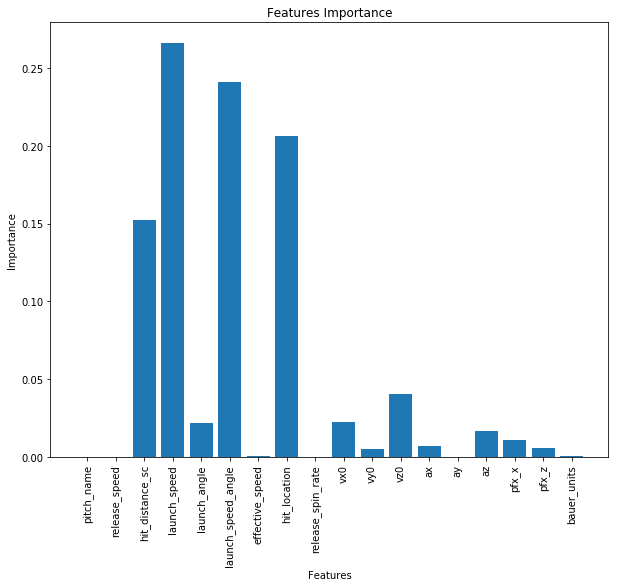

In [21]:
#Feature important breakdown of the model
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In looking at the feature importance, the model leans heavily on launch speed. Considering dropping launch speed angle since that is an interpretation. 

Suprised that pitch velocity is almost irrelevant. 

An SVM model can't handle more than 200,000 rows so going to create a subset for the model

In [8]:
#186,644 rows for the SVM model
#getting stuck
svm_data = data.loc[::5]
svm_data.shape

(149315, 19)

In [9]:
#Breaking down into X and Y values to feed to model
X_svm = svm_data.drop(columns=['events'], axis =1)
y_svm = svm_data.events
#train and test data
from sklearn.model_selection import train_test_split
X_svm_train, X__svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, random_state=1)

In [ ]:
#SVM
from sklearn import svm
clf = svm.SVC(gamma=0.00001, decision_function_shape='ovo', class_weight= None, )
clf.fit(X_svm_train, y_svm_train)

In [11]:
print(f"R-sqaured training data: {clf.score(X_svm_train, y_svm_train)}")
print(f"R-squared testing data: {clf.score(X__svm_test, y_svm_test)}")

R-sqaured training data: 0.5651063525797868
R-squared testing data: 0.5700125907471403


In [13]:
#looking at the classifciation report for the SVM
clf_predict = clf.predict(X__svm_test)
from sklearn.metrics import classification_report
print(classification_report( y_svm_test, clf_predict))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.50      1.00      0.66     13523
      double       0.40      0.01      0.02       454
 field_error       0.00      0.00      0.00       106
        foul       0.92      0.42      0.57      6665
hit_by_pitch       0.00      0.00      0.00        87
    home_run       0.70      0.75      0.72       257
         out       0.72      0.91      0.81      4407
      single       0.67      0.52      0.58      1504
      strike       0.00      0.00      0.00     10284
      triple       0.00      0.00      0.00        42

   micro avg       0.57      0.57      0.57     37329
   macro avg       0.39      0.36      0.34     37329
weighted avg       0.46      0.57      0.47     37329



In [ ]:
results = pd.DataFrame({"Prediction": clf_predict, "Actual": y_svm_test}).reset_index(drop=True)

In [20]:
predict_counts = results['Prediction'].value_counts()
predict_counts

ball        27272
out          5577
foul         3032
single       1162
home_run      276
double         10
Name: Prediction, dtype: int64

In [35]:
actual_counts = results['Actual'].value_counts()
actual_counts.index

Index(['ball', 'strike', 'foul', 'out', 'single', 'double', 'home_run',
       'field_error', 'hit_by_pitch', 'triple'],
      dtype='object')

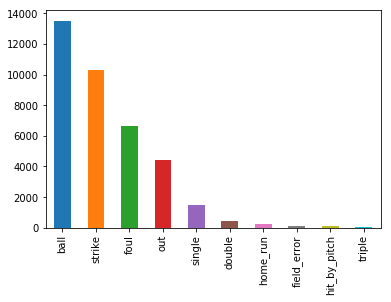

In [24]:
actual_counts.plot(kind='bar')

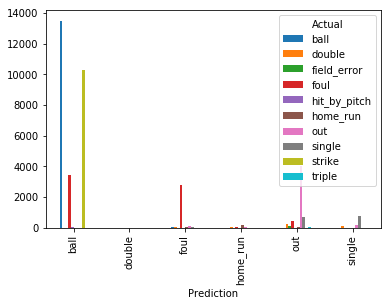

In [26]:
pd.crosstab(results.Prediction, results.Actual).plot(kind='bar')

In [50]:
#trying to get a comparison plot of prediction v actual
import matplotlib.pyplot as plt

N= 10
ind = np.arange(N)
width = 0.35 

plt.figure(figsize=((10,8)))
ax.bar(x = actual_counts.index, height = actual_counts.values)
ax.bar(x = predict_counts.index, height = predict_counts.values)
ax.set_xlabel('Test histogram')
ax.set_ylabel('Number of Results')
ax.set_xbound(lower = 0, upper = 10)
ax.set_ybound(lower = 0, upper = 300000)
plt.show()

TypeError: must be str, not float

<Figure size 720x576 with 0 Axes>

In [27]:
import seaborn as sns
ax = sns.barplot(x= results.Prediction, y="total_bill", hue="sex", data=tips)

NameError: name 'tips' is not defined

By dropping hit location and launch speed angle, effectively handi-capping the model. Really testing its ability.

In [15]:
X_svm = svm_data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y_svm = svm_data.events

In [18]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
svm_scale = scaler.fit_transform(X_svm)
#train and test data
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_train, y_test = train_test_split(svm_scale, y_svm, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
#Got it to run with 150,000 rows
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight= None)
clf.fit(X_svm_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
clf.score(X_svm_train, y_train)

0.5337631489650492

In [21]:
clf.score(X_svm_test, y_test)

0.5378124246564333

In [23]:
clf_svm_predict = clf.predict(X_svm_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_svm_predict ))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.50      0.96      0.66     13523
      double       0.57      0.01      0.02       454
 field_error       0.00      0.00      0.00       106
        foul       0.66      0.31      0.42      6665
hit_by_pitch       0.00      0.00      0.00        87
    home_run       0.64      0.63      0.64       257
         out       0.62      0.80      0.70      4407
      single       0.55      0.35      0.43      1504
      strike       0.53      0.08      0.14     10284
      triple       0.00      0.00      0.00        42

   micro avg       0.54      0.54      0.54     37329
   macro avg       0.41      0.31      0.30     37329
weighted avg       0.55      0.54      0.46     37329



In [7]:
test_data = data.loc[:730000:40]

Running full model


In [24]:
X = data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y = data.events

In [8]:
#setting up X and y , dropping hit location too
X = test_data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y = test_data.events

In [25]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
#train and test data
from sklearn.model_selection import train_test_split
X_scale_train, X_scale_test, y_train, y_test = train_test_split(X_scale, y, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
#14,000 rows to test
test_data.shape

(14023, 27)

In [31]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [12]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.504388933636466
Testing Data Score: 0.5032950429695034


In [14]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [15]:
results['Prediction'].value_counts()

ball        115682
out          31345
strike       21126
foul         16272
home_run      1846
double         371
single           2
Name: Prediction, dtype: int64

In [16]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

        ball       0.85      0.50      0.63    115682
      double       0.08      0.44      0.13       371
 field_error       0.00      0.00      0.00         0
        foul       0.30      0.62      0.40     16272
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.78      0.59      0.67      1846
         out       0.77      0.54      0.64     31345
      single       0.00      0.00      0.00         2
      strike       0.16      0.39      0.23     21126
      triple       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50    186644
   macro avg       0.29      0.31      0.27    186644
weighted avg       0.71      0.50      0.56    186644



In [16]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(n_iter= 10)
SGD.fit(X_train,y_train)
SGD.score(X_test, y_test)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.3580556823368325

In [17]:
SGDpredict = SGD.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(SGDpredict, y_test))

              precision    recall  f1-score   support

        ball       0.00      0.00      0.00         0
      double       0.00      0.00      0.00         0
 field_error       0.00      0.00      0.00         0
        foul       0.39      0.38      0.38       806
hit_by_pitch       0.08      0.02      0.03        62
    home_run       0.07      0.50      0.12         4
         out       0.00      1.00      0.01         2
      single       0.32      0.21      0.25       273
      strike       1.00      0.37      0.54      3235
      triple       0.00      0.00      0.00         0

   micro avg       0.36      0.36      0.36      4382
   macro avg       0.19      0.25      0.13      4382
weighted avg       0.83      0.36      0.49      4382



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
#trying gradient boosting
#definitely the best so far
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.6220498597148577


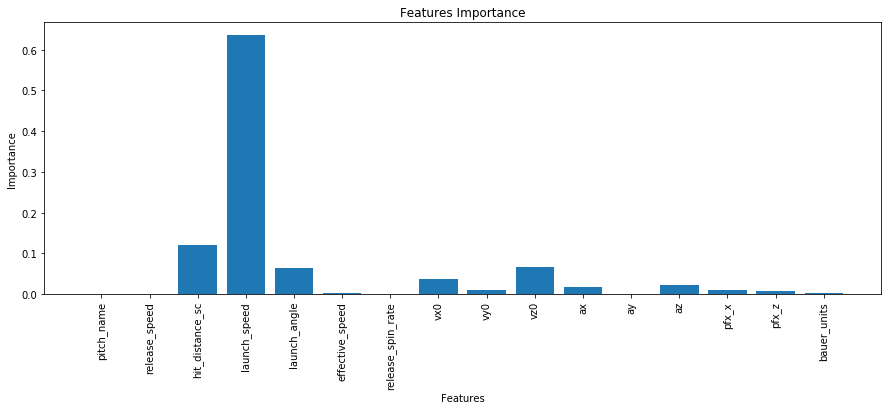

In [19]:
#might drop hit location
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [26]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.63      0.71      0.67      1606
      double       0.33      0.17      0.22        54
 field_error       0.00      0.00      0.00        12
        foul       0.69      0.29      0.41       782
hit_by_pitch       0.00      0.00      0.00        12
    home_run       0.67      0.64      0.65        28
         out       0.64      0.75      0.69       503
      single       0.50      0.52      0.51       176
      strike       0.49      0.58      0.53      1206
      triple       0.00      0.00      0.00         3

   micro avg       0.59      0.59      0.59      4382
   macro avg       0.40      0.37      0.37      4382
weighted avg       0.59      0.59      0.57      4382



Gradient Boosting with Scaled Data

In [27]:
#trying gradient boosting
#definitely the best so far
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_scale_train, y_train)
print(f"R-squared = {model.score(X_scale_train,y_train)}")

R-squared = 0.6220498597148577


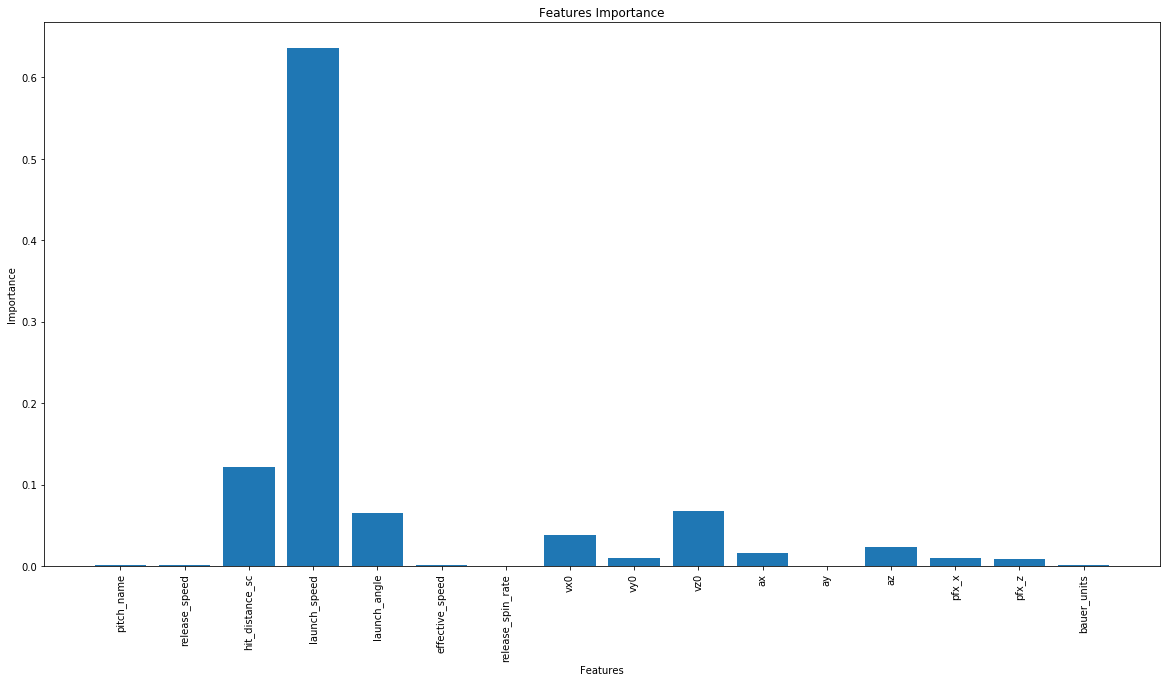

In [39]:
#might drop hit location
import matplotlib.pyplot as plt
plt.figure(1, figsize=(20, 10))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
#plt.show()
plt.savefig('feature_importance.png')

In [40]:
modelpredict = model.predict(X_scale_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.66      0.74      0.70     67064
      double       0.42      0.16      0.23      2134
 field_error       0.30      0.01      0.01       422
        foul       0.72      0.30      0.42     33820
hit_by_pitch       0.23      0.02      0.03       407
    home_run       0.69      0.72      0.70      1390
         out       0.67      0.80      0.73     22106
      single       0.57      0.57      0.57      7210
      strike       0.54      0.63      0.58     51875
      triple       0.00      0.00      0.00       216

   micro avg       0.62      0.62      0.62    186644
   macro avg       0.48      0.39      0.40    186644
weighted avg       0.63      0.62      0.61    186644



In [ ]:
#going to try support vectors
#scores were lower with a balanced class weight
#this model is supposed to perform much better when scaling data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight= None)
clf.fit(X_scale_train, y_train)

In [22]:
clf.score(X_scale_train, y_train)

0.530655712764339

In [23]:
clf.score(X__scale_test, y_test)

0.5298950251026928

In [24]:
clf_predict = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

        ball       0.99      0.50      0.66      3212
      double       0.00      0.00      0.00         0
 field_error       0.00      0.00      0.00         0
        foul       0.28      0.70      0.40       311
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.68      0.63      0.66        30
         out       0.82      0.60      0.69       691
      single       0.39      0.60      0.47       115
      strike       0.01      0.39      0.01        23
      triple       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53      4382
   macro avg       0.32      0.34      0.29      4382
weighted avg       0.89      0.53      0.64      4382



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#SVM with scaled data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight='balanced', cache_size= 500)
clf.fit(X_scale_train, y_train)


In [18]:
clf.score(X_scale_train, y_train)

0.5699343919368641

In [19]:
clf_predict = clf.predict(X_scale_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_predict))

              precision    recall  f1-score   support

        ball       0.49      1.00      0.66      1253
      double       0.00      0.00      0.00        36
 field_error       0.00      0.00      0.00         5
        foul       0.97      0.48      0.65       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       0.83      0.44      0.58        34
         out       0.66      0.99      0.79       414
      single       0.00      0.00      0.00       150
      strike       0.00      0.00      0.00       972
      triple       0.00      0.00      0.00         8

   micro avg       0.56      0.56      0.56      3506
   macro avg       0.30      0.29      0.27      3506
weighted avg       0.43      0.56      0.45      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
#For thursday - finish github slides
#identify 'best' model
#lots 

In [20]:
#logistic regression with scaled data
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [21]:
classifier.fit(X_scale_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [22]:
print(f"Training Data Score: {classifier.score(X_scale_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_scale_test, y_test)}")

Training Data Score: 0.5698393077873919
Testing Data Score: 0.5681688533941814


Going to use a linear SVM to get a model to run